## CMPINF 2100 Fall 2021 - Week 08

### PCA with the Sonar data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Sonar data set

In [2]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

In [3]:
sonar_df = pd.read_csv( sonar_url, header=None, prefix='X' )

In [4]:
print( sonar_df.shape )

(208, 61)


In [5]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      208 non-null    float64
 1   X1      208 non-null    float64
 2   X2      208 non-null    float64
 3   X3      208 non-null    float64
 4   X4      208 non-null    float64
 5   X5      208 non-null    float64
 6   X6      208 non-null    float64
 7   X7      208 non-null    float64
 8   X8      208 non-null    float64
 9   X9      208 non-null    float64
 10  X10     208 non-null    float64
 11  X11     208 non-null    float64
 12  X12     208 non-null    float64
 13  X13     208 non-null    float64
 14  X14     208 non-null    float64
 15  X15     208 non-null    float64
 16  X16     208 non-null    float64
 17  X17     208 non-null    float64
 18  X18     208 non-null    float64
 19  X19     208 non-null    float64
 20  X20     208 non-null    float64
 21  X21     208 non-null    float64
 22  X2

In [6]:
sonar_df

X0      X1      X2      X3      X4      X5      X6      X7      X8  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         X9  ...     X51     X52     X53     X54     X55     X56     X57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

        X58     X59  X60  
0    0.0090  0.0032    R  
1    0.0052  0.0044    R  
2    0.0095  0.0078    R  
3    0.0040  0.0117    R  
4    0.0107  0.0094    R  
..      ...     ...  ...  
203  0.0193  0.0157    M  
204  0.0062  0.0067    M  
205  0.0077  0.0031    M  
206  0.0036  0.0048    M  
207  0.0061  0.0115    M  

[208 rows x 61 columns]

In [7]:
sonar_df.rename(columns={'X60': 'response'}, inplace=True)

In [8]:
sonar_df

X0      X1      X2      X3      X4      X5      X6      X7      X8  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         X9  ...     X51     X52     X53     X54     X55     X56     X57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

        X58     X59  response  
0    0.0090  0.0032         R  
1    0.0052  0.0044         R  
2    0.0095  0.0078         R  
3    0.0040  0.0117         R  
4    0.0107  0.0094         R  
..      ...     ...       ...  
203  0.0193  0.0157         M  
204  0.0062  0.0067         M  
205  0.0077  0.0031         M  
206  0.0036  0.0048         M  
207  0.0061  0.0115         M  

[208 rows x 61 columns]

In [9]:
sonar_df.response = sonar_df.response.astype('category')

In [10]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   X0        208 non-null    float64 
 1   X1        208 non-null    float64 
 2   X2        208 non-null    float64 
 3   X3        208 non-null    float64 
 4   X4        208 non-null    float64 
 5   X5        208 non-null    float64 
 6   X6        208 non-null    float64 
 7   X7        208 non-null    float64 
 8   X8        208 non-null    float64 
 9   X9        208 non-null    float64 
 10  X10       208 non-null    float64 
 11  X11       208 non-null    float64 
 12  X12       208 non-null    float64 
 13  X13       208 non-null    float64 
 14  X14       208 non-null    float64 
 15  X15       208 non-null    float64 
 16  X16       208 non-null    float64 
 17  X17       208 non-null    float64 
 18  X18       208 non-null    float64 
 19  X19       208 non-null    float64 
 20  X20       

In [11]:
sonar_df.response.cat.categories

Index(['M', 'R'], dtype='object')

In [12]:
sonar_df.response.value_counts()

M    111
R     97
Name: response, dtype: int64

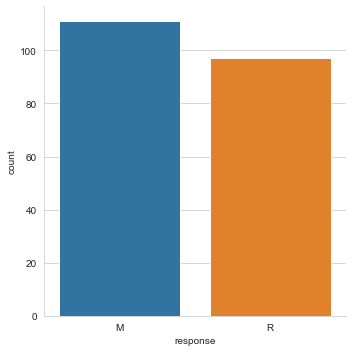

In [13]:
sns.set_style('whitegrid')

sns.catplot(data = sonar_df, x='response', kind='count')

plt.show()

Explore the continuous features.

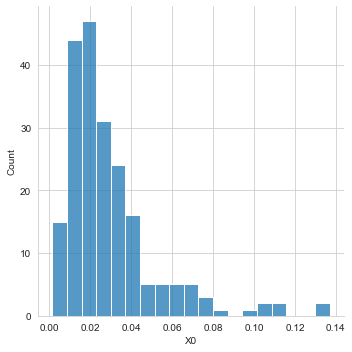

In [14]:
sns.displot(data = sonar_df, x='X0', kind='hist')

plt.show()

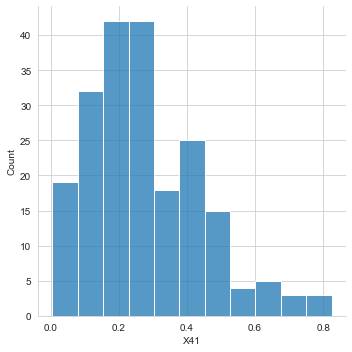

In [15]:
sns.displot(data = sonar_df, x='X41', kind='hist')

plt.show()

Let's use separate subplots for every column of the numeric features.

C:\Users\jyurk\AppData\Local\Temp/ipykernel_20508/3777916670.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  sonar_df.hist(ax=ax)


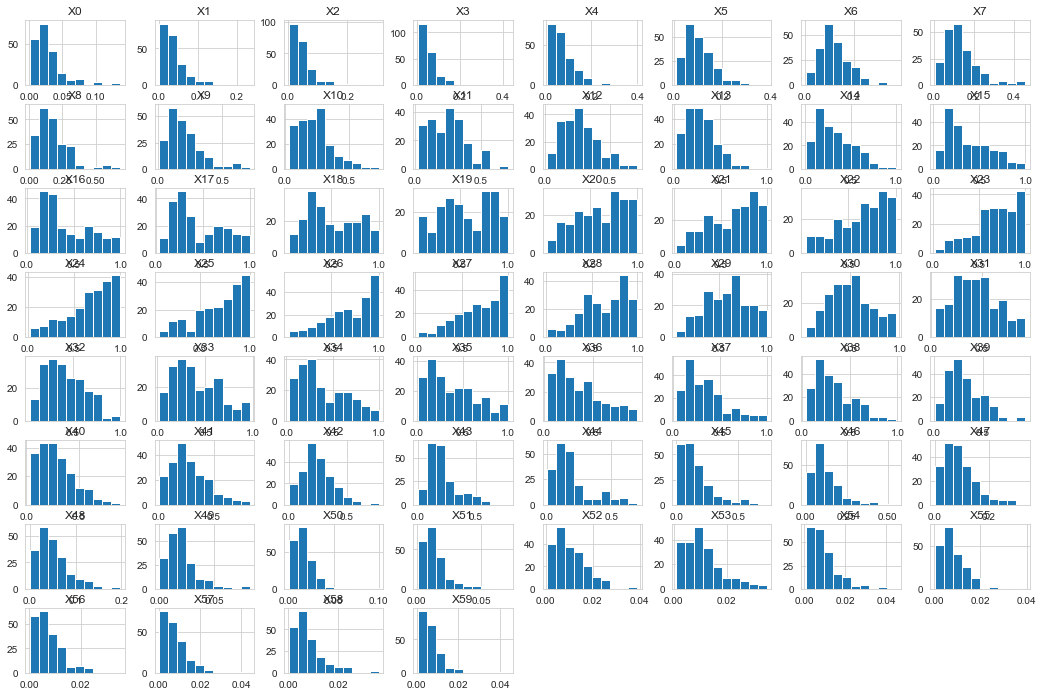

In [16]:
fig, ax = plt.subplots(figsize=(18, 12))

sonar_df.hist(ax=ax)

plt.show()

Use the default wide-format plotting methods in Seaborn.

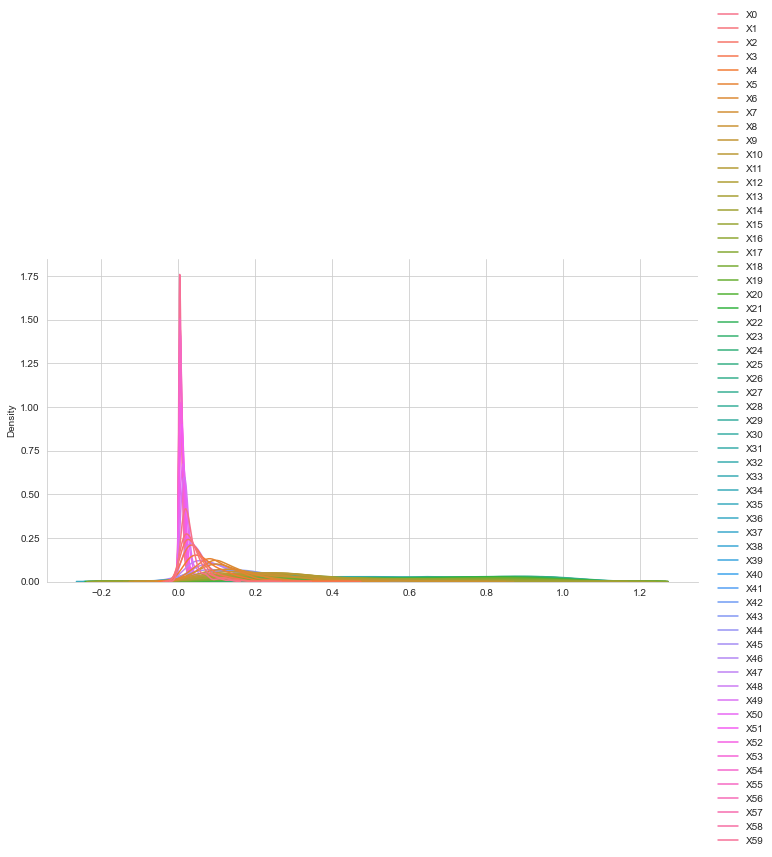

In [17]:
sns.displot(data = sonar_df, kind='kde', aspect=2)

plt.show()

Make a Seaborn figure with sepearate histograms per **facet** for each variable.

Reshape from wide to long-format to be able to make use of **facets**.

In [18]:
sonar_features = sonar_df.select_dtypes('number').copy()

feature_names = sonar_features.columns

In [19]:
lf = sonar_df.melt(id_vars=['response'], value_vars=feature_names, ignore_index=True)

In [20]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   response  12480 non-null  category
 1   variable  12480 non-null  object  
 2   value     12480 non-null  float64 
dtypes: category(1), float64(1), object(1)
memory usage: 207.4+ KB


In [21]:
lf

response variable   value
0            R       X0  0.0200
1            R       X0  0.0453
2            R       X0  0.0262
3            R       X0  0.0100
4            R       X0  0.0762
...        ...      ...     ...
12475        M      X59  0.0157
12476        M      X59  0.0067
12477        M      X59  0.0031
12478        M      X59  0.0048
12479        M      X59  0.0115

[12480 rows x 3 columns]

In [22]:
lf.variable.value_counts()

X0     208
X1     208
X32    208
X33    208
X34    208
X35    208
X36    208
X37    208
X38    208
X39    208
X40    208
X41    208
X42    208
X43    208
X44    208
X45    208
X46    208
X47    208
X48    208
X49    208
X50    208
X51    208
X52    208
X53    208
X54    208
X55    208
X56    208
X57    208
X58    208
X31    208
X30    208
X29    208
X14    208
X2     208
X3     208
X4     208
X5     208
X6     208
X7     208
X8     208
X9     208
X10    208
X11    208
X12    208
X13    208
X15    208
X28    208
X16    208
X17    208
X18    208
X19    208
X20    208
X21    208
X22    208
X23    208
X24    208
X25    208
X26    208
X27    208
X59    208
Name: variable, dtype: int64

In [23]:
len( lf.variable.value_counts() )

60

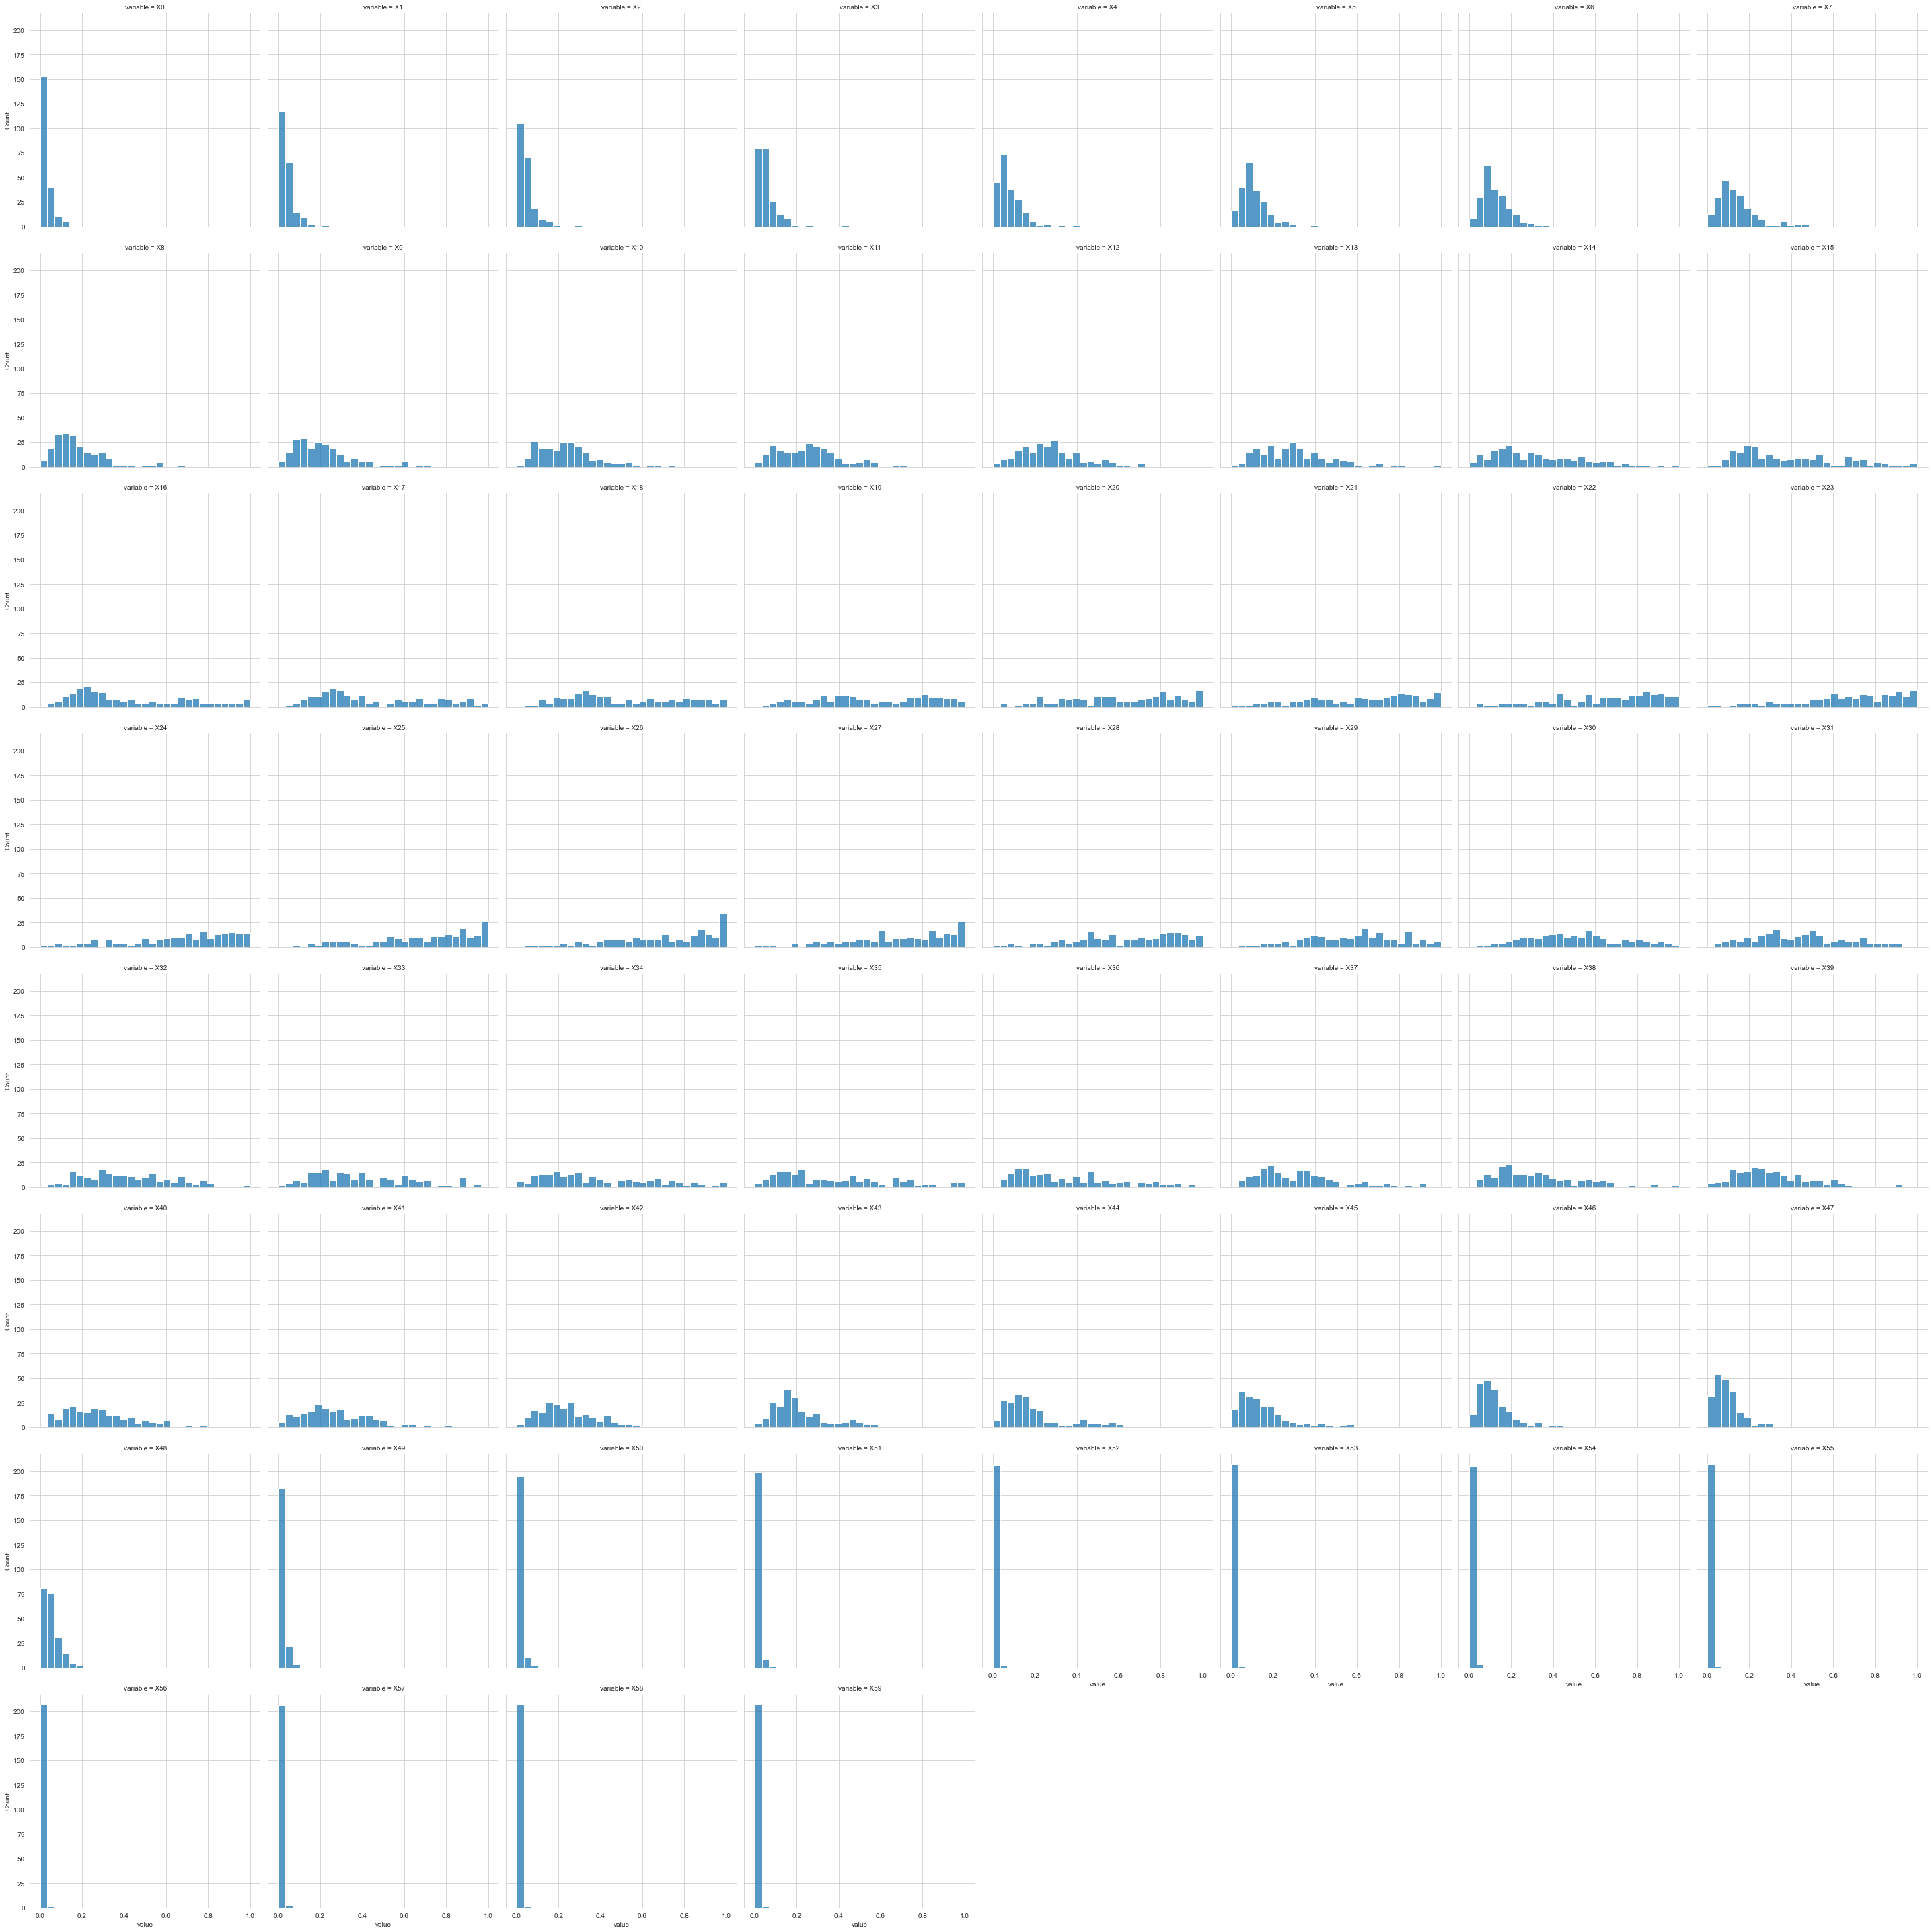

In [24]:
sns.displot(data = lf, x='value', col='variable', col_wrap=8)

plt.show()

To get greater control over the facets we need to use `sns.FacetGrid()`.

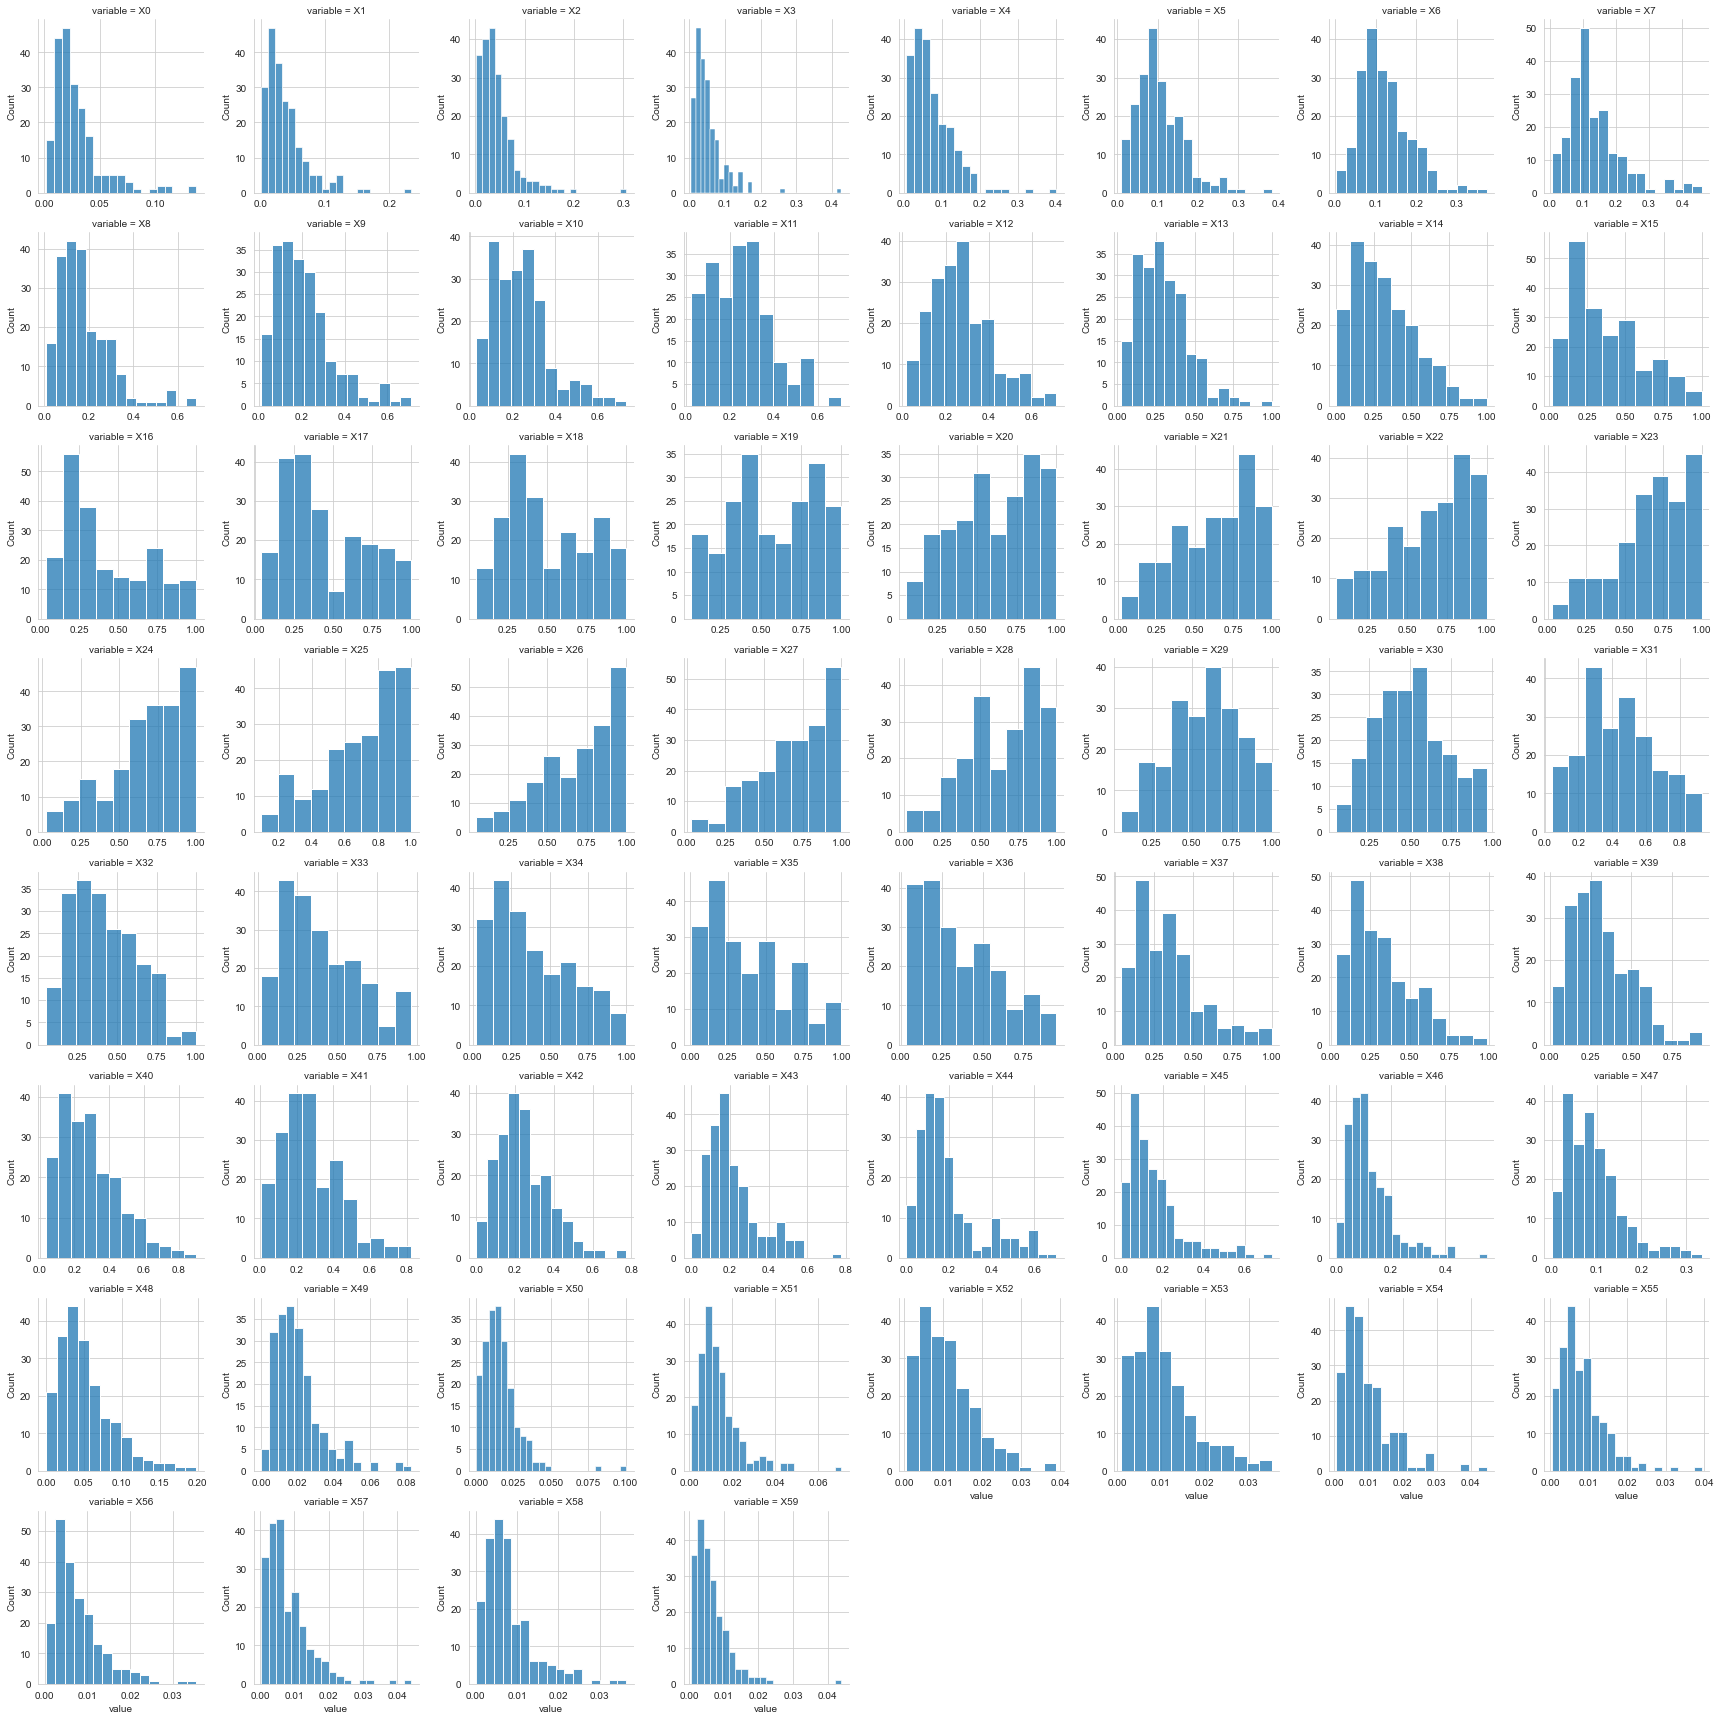

In [26]:
g = sns.FacetGrid(data = lf, col='variable', col_wrap=8, sharex=False, sharey=False)

g.map_dataframe(sns.histplot, x='value')

plt.show()

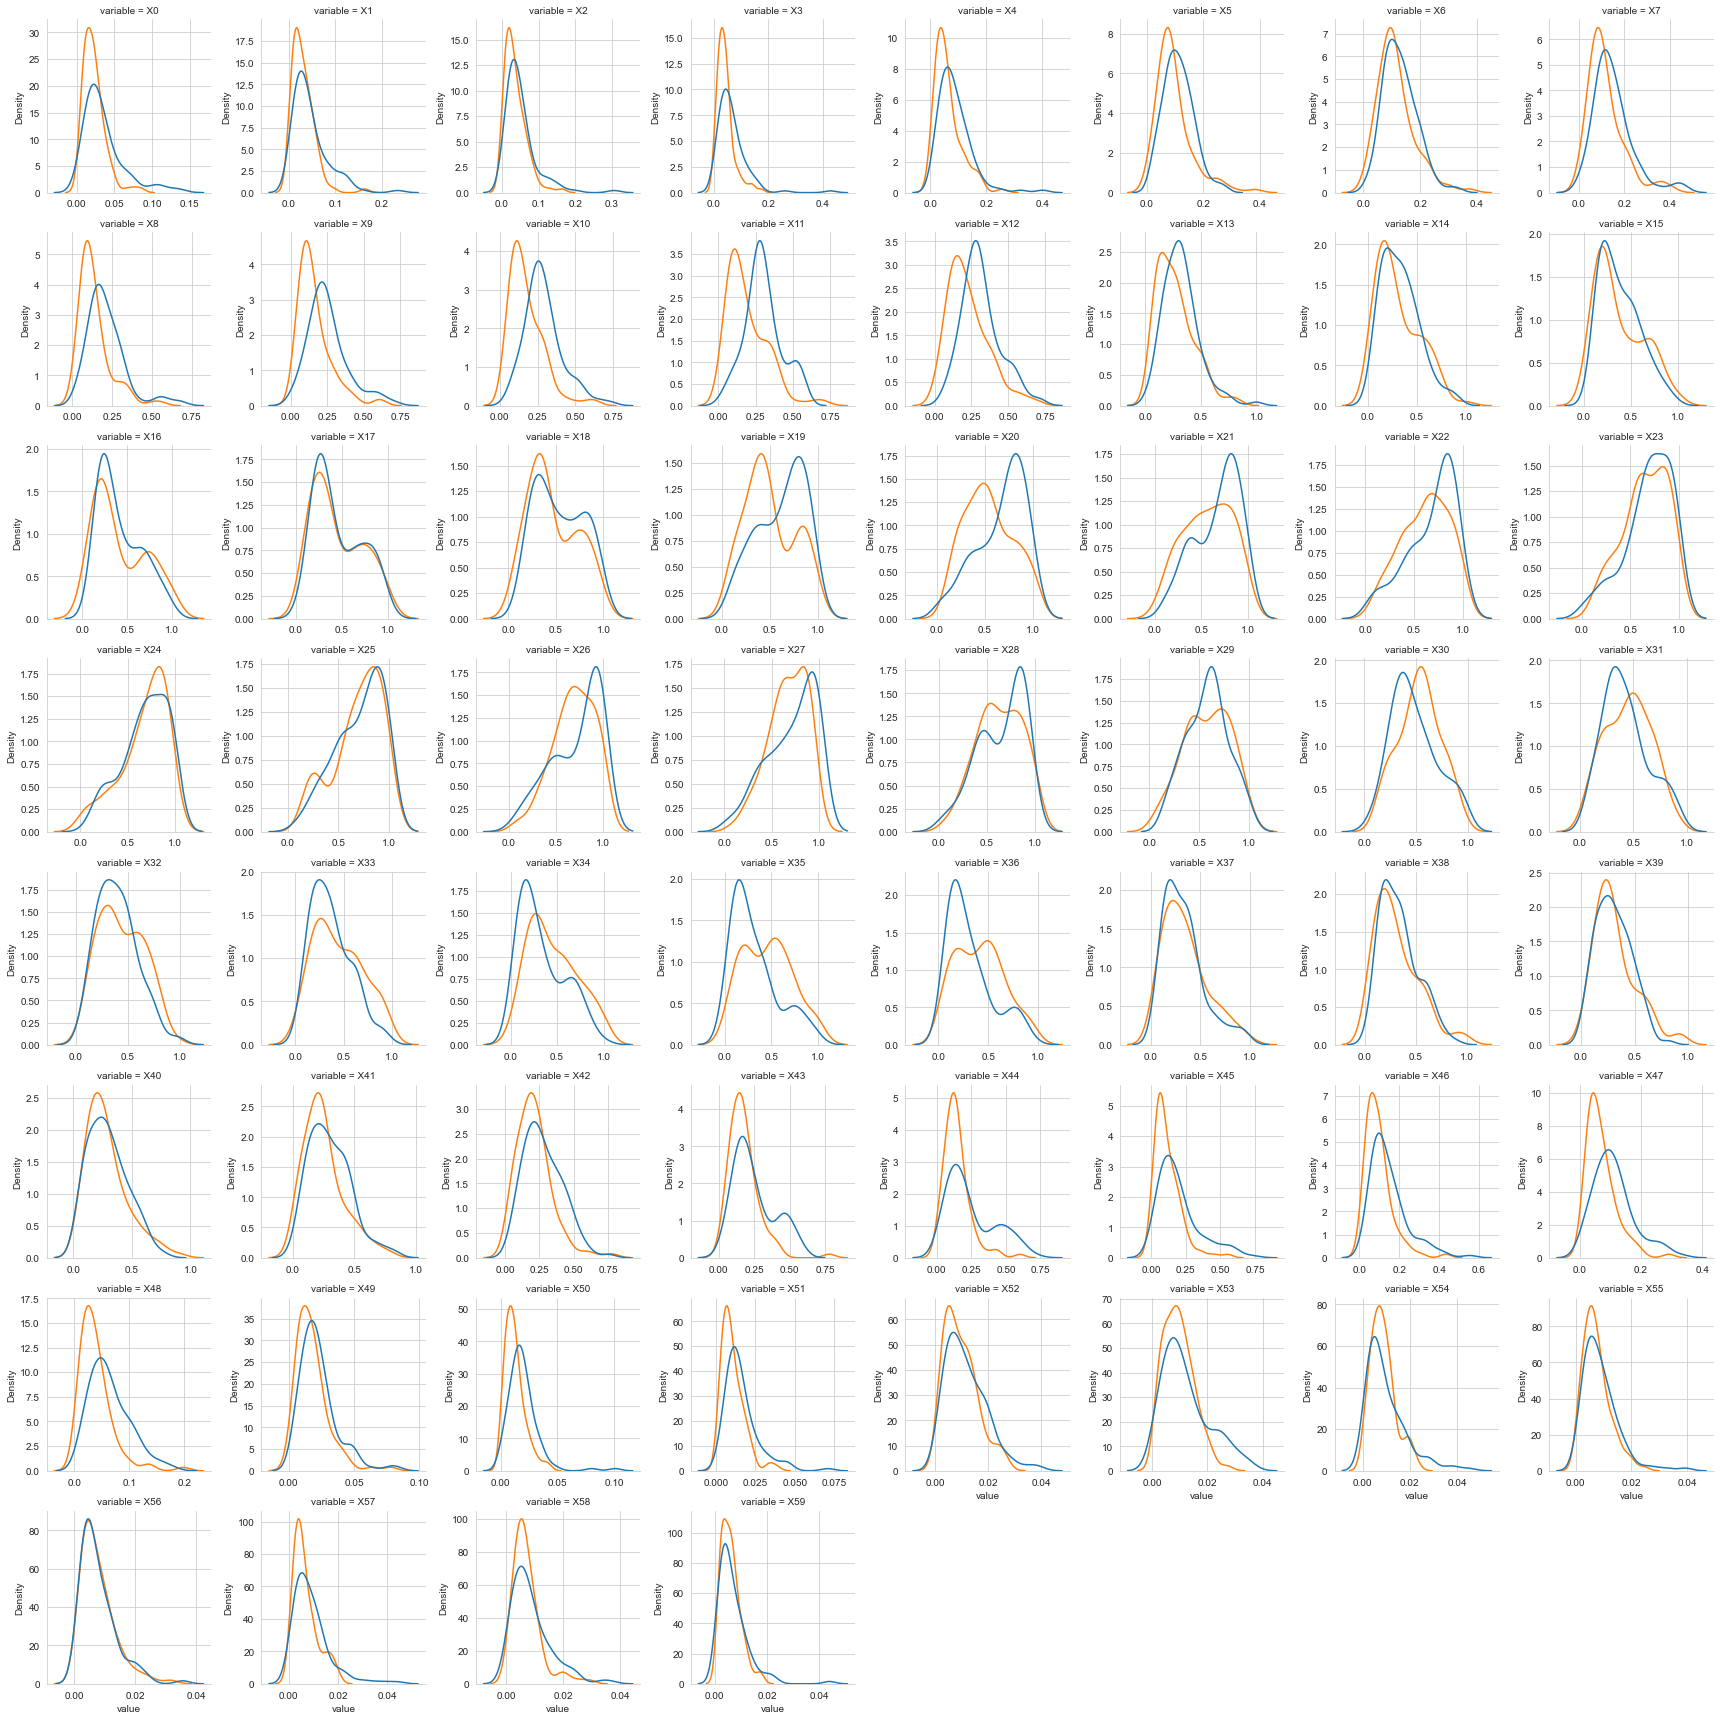

In [28]:
g = sns.FacetGrid(data = lf, col='variable', col_wrap=8, sharex=False, sharey=False)

g.map_dataframe(sns.kdeplot, x='value', hue='response', common_norm=False)

plt.show()

Boxplots makes it easier to directly compare the summary statistics. Examine the summary statistics per continuous variable regardless of the categorical `response`.

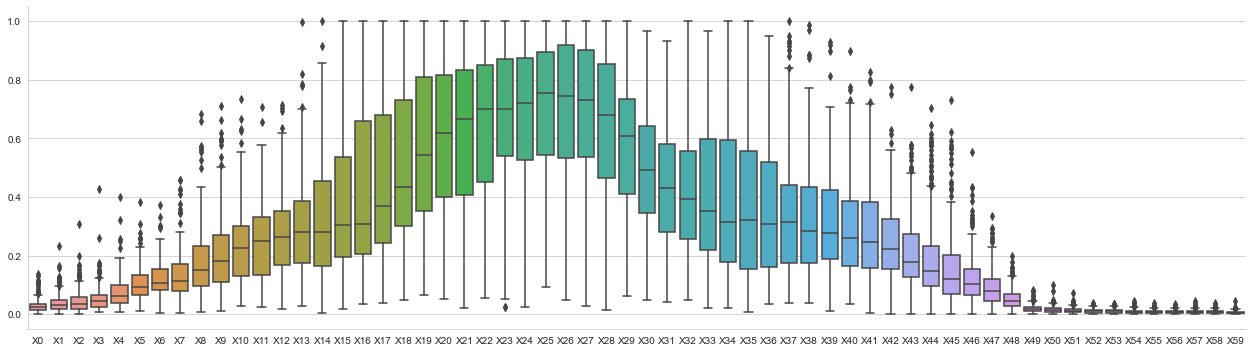

In [30]:
sns.catplot(data = sonar_df, kind='box', aspect=3.5)

plt.show()

Make a boxplot comparing the variable distribution summary statistics grouped by `response`.

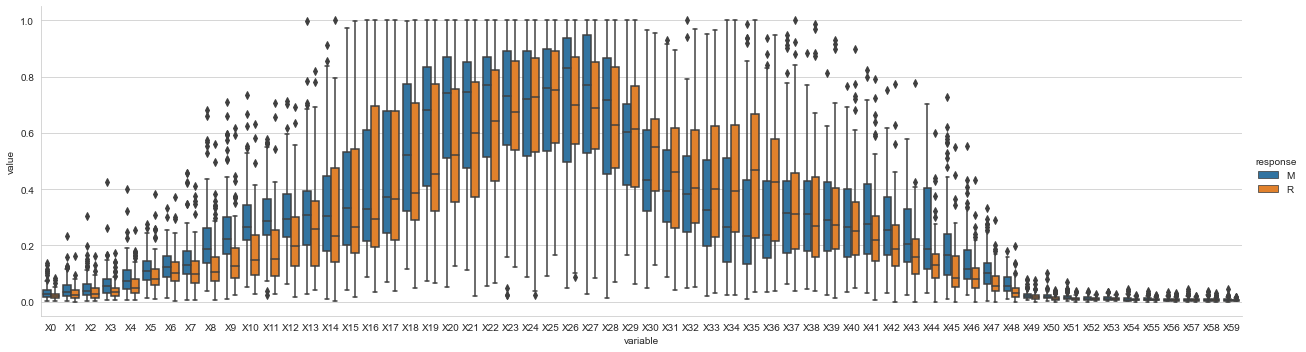

In [31]:
sns.catplot(data = lf, x='variable', y='value', hue='response', kind='box', aspect=3.5)

plt.show()

Focusing just on the **average** value of the variable grouped by `response`. The point plot will show the average **and** the confidence interval on the average.

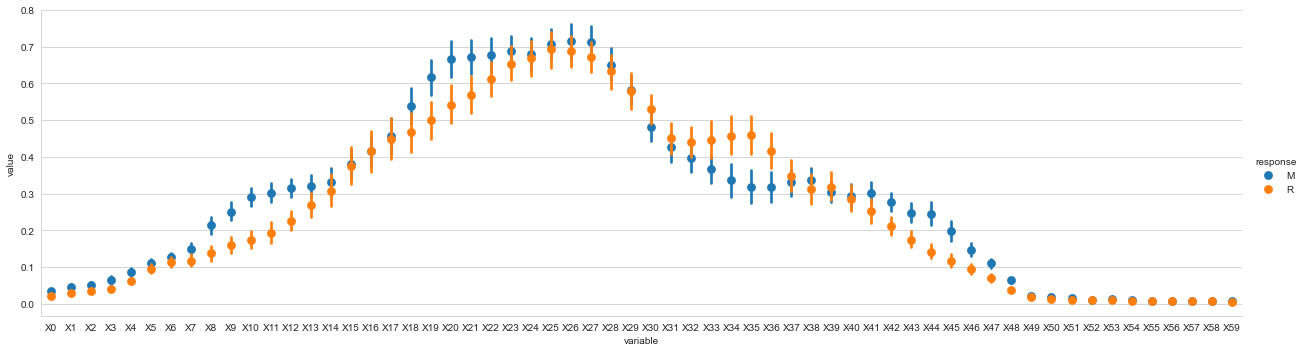

In [33]:
sns.catplot(data = lf, x='variable', y='value', hue='response', kind='point', ci=95, join=False, aspect=3.5)

plt.show()

### Variable relationships

The correlation plot to examine which variables are related to each other.

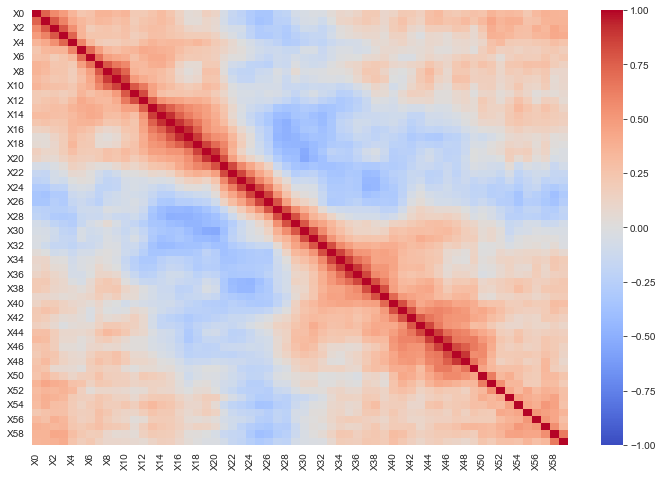

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = sonar_df.corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', 
            ax=ax)

plt.show()

Does the correlation structure change across groups? Look at the correlation plot between the continuous features for each value of `response`.

In [37]:
response_values = sonar_df.response.cat.categories.tolist()

In [38]:
response_values

['M', 'R']

What does `enumerate()` do?

In [39]:
for index_value, response_name in enumerate(response_values):
    print( index_value )
    print( response_name )
    print( '-- -- --' )

0
M
-- -- --
1
R
-- -- --


In [41]:
print( response_values[0] )

print( response_values[1] )

M
R


Apply the `.corr()` method after grouping by `response`.

In [42]:
sonar_df.groupby(['response']).corr()

X0        X1        X2        X3        X4        X5  \
response                                                                   
M        X0   1.000000  0.783947  0.607217  0.538198  0.374794  0.265313   
         X1   0.783947  1.000000  0.798240  0.621277  0.404582  0.285976   
         X2   0.607217  0.798240  1.000000  0.808222  0.573819  0.301853   
         X3   0.538198  0.621277  0.808222  1.000000  0.756090  0.263246   
         X4   0.374794  0.404582  0.573819  0.756090  1.000000  0.472487   
...                ...       ...       ...       ...       ...       ...   
R        X55  0.139376  0.296085  0.294758  0.175723  0.141973  0.276164   
         X56  0.271153  0.197175  0.360617  0.341398  0.131243  0.150329   
         X57  0.245461  0.339230  0.357181  0.247430  0.135547  0.080440   
         X58  0.068473  0.200830  0.275996  0.175349  0.183776  0.134369   
         X59  0.081974  0.217208  0.257229  0.115923  0.135659  0.143853   

                    X6        X7        X8        X9  ...       X50       X51  \
response                                              ...                       
M        X0   0.248499  0.317525  0.269724  0.232297  ...  0.247820  0.383970   
         X1   0.189745  0.260391  0.215417  0.127245  ...  0.316439  0.493794   
         X2   0.079446  0.073000  0.056679 -0.001124  ...  0.227444  0.440850   
         X3   0.143279  0.088565  0.055072  0.009118  ...  0.093955  0.357852   
         X4   0.173684 -0.015053 -0.072556 -0.089119  ...  0.024579  0.232731   
...                ...       ...       ...       ...  ...       ...       ...   
R        X55  0.241161  0.279460  0.101503  0.078120  ...  0.098002  0.028793   
         X56  0.189387  0.362243  0.352957  0.335899  ...  0.023743  0.028285   
         X57  0.088492  0.187300  0.105230  0.146996  ...  0.220567  0.157240   
         X58  0.113277  0.191932  0.065525  0.123355  ...  0.248289  0.069700   
         X59  0.158014  0.214041 -0.039056  0.105013  ...  0.347218  0.118140   

                   X52       X53       X54       X55       X56       X57  \
response                                                                   
M        X0   0.335548  0.369332  0.378374  0.216367  0.368172  0.365448   
         X1   0.379255  0.394056  0.390750  0.218963  0.345689  0.319436   
         X2   0.385773  0.401487  0.309270  0.260026  0.413314  0.291909   
         X3   0.438598  0.344309  0.284669  0.292302  0.372026  0.336071   
         X4   0.402319  0.219546  0.198967  0.194241  0.289188  0.239418   
...                ...       ...       ...       ...       ...       ...   
R        X55  0.314731  0.211119  0.245662  1.000000  0.425075  0.287584   
         X56  0.093473  0.172256  0.131229  0.425075  1.000000  0.402218   
         X57  0.240337  0.202872  0.246434  0.287584  0.402218  1.000000   
         X58  0.243011  0.226194  0.225749  0.177656  0.208971  0.449847   
         X59  0.262433  0.219505  0.228338  0.284521  0.116897  0.340206   

                   X58       X59  
response                          
M        X0   0.435246  0.411431  
         X1   0.389355  0.393674  
         X2   0.469410  0.403399  
         X3   0.491601  0.477271  
         X4   0.315575  0.287459  
...                ...       ...  
R        X55  0.177656  0.284521  
         X56  0.208971  0.116897  
         X57  0.449847  0.340206  
         X58  1.000000  0.515609  
         X59  0.515609  1.000000  

[120 rows x 60 columns]

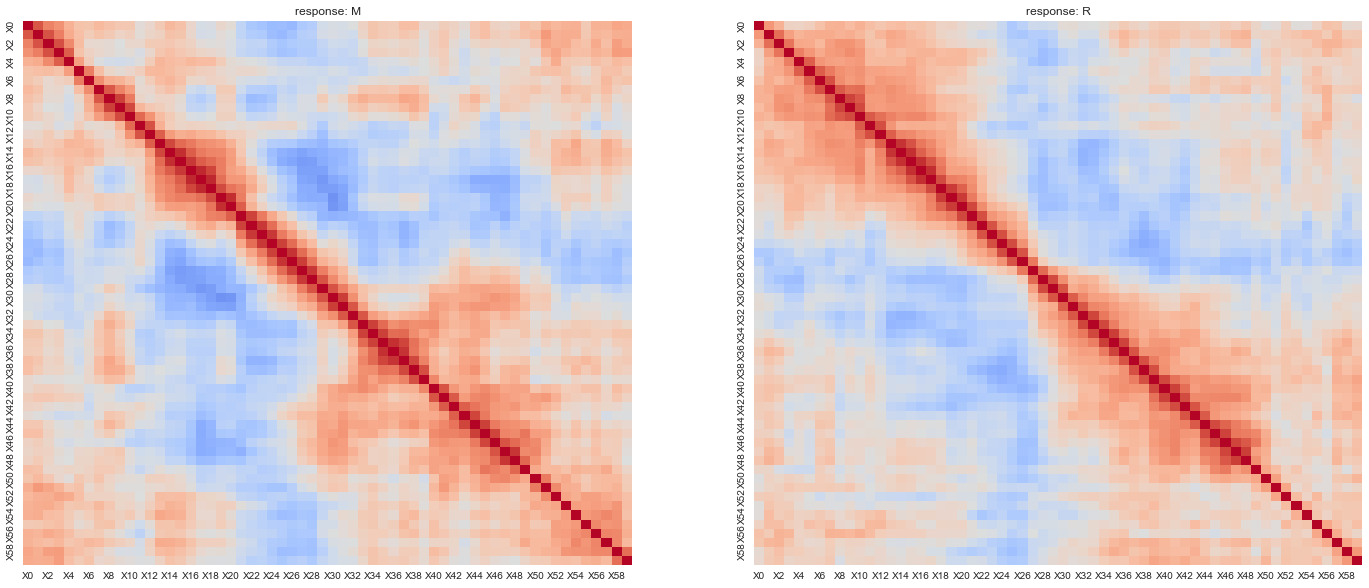

In [43]:
fig, axs = plt.subplots(1, len(response_values), figsize=(24, 10))

for ix, aname in enumerate(response_values):
    sns.heatmap(data = sonar_df.groupby(['response']).corr().loc[aname],
                vmin=-1, vmax=1, center=0,
                cmap='coolwarm', cbar=False,
                ax=axs[ix])
    
    axs[ix].set_title('response: '+aname)

plt.show()

## PCA

Principal Components Analysis (PCA) exploits correlation between variables. New variables are created accounting for all of the original variables. 

Before running PCA, we should **standardize** the variables.

In [44]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

Standardize the **continuous variables**.

In [45]:
Xsonar = StandardScaler().fit_transform( sonar_features )

In [46]:
print( type(Xsonar) )

print( Xsonar.shape )

<class 'numpy.ndarray'>
(208, 60)


Check that all variables have roughly the same range.

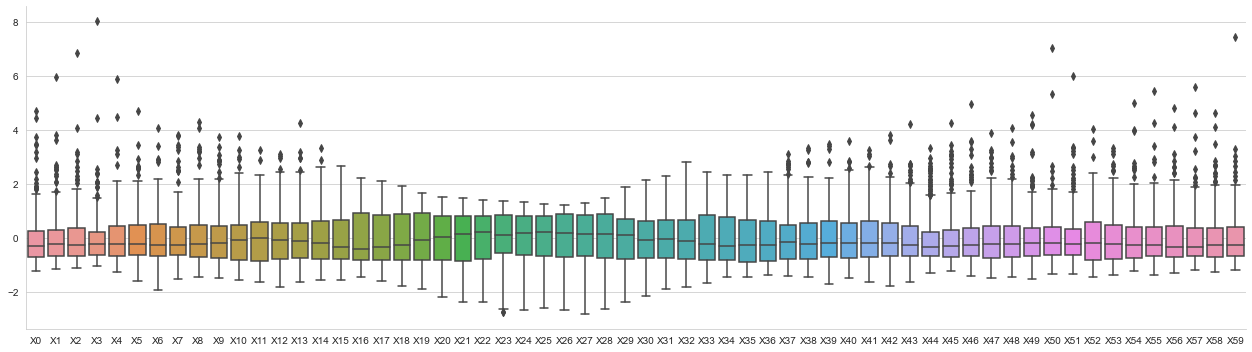

In [47]:
sns.catplot(data = pd.DataFrame(Xsonar, columns=sonar_features.columns), kind='box', aspect=3.5)

plt.show()

To apply PCA we need to first initialize the object, then fit, and finally transform.

In [48]:
pca_object = PCA()

In [49]:
pca_object.fit( Xsonar )

PCA()

In [50]:
sonar_pcs = pca_object.transform( Xsonar )

In [51]:
print( type(sonar_pcs) )

<class 'numpy.ndarray'>


In [52]:
print( sonar_pcs.shape )

(208, 60)


In [59]:
pc_names = ['pc_'+str(d).zfill(2) for d in range(1, (sonar_pcs.shape[1]+1))]

In [60]:
pc_names

['pc_01',
 'pc_02',
 'pc_03',
 'pc_04',
 'pc_05',
 'pc_06',
 'pc_07',
 'pc_08',
 'pc_09',
 'pc_10',
 'pc_11',
 'pc_12',
 'pc_13',
 'pc_14',
 'pc_15',
 'pc_16',
 'pc_17',
 'pc_18',
 'pc_19',
 'pc_20',
 'pc_21',
 'pc_22',
 'pc_23',
 'pc_24',
 'pc_25',
 'pc_26',
 'pc_27',
 'pc_28',
 'pc_29',
 'pc_30',
 'pc_31',
 'pc_32',
 'pc_33',
 'pc_34',
 'pc_35',
 'pc_36',
 'pc_37',
 'pc_38',
 'pc_39',
 'pc_40',
 'pc_41',
 'pc_42',
 'pc_43',
 'pc_44',
 'pc_45',
 'pc_46',
 'pc_47',
 'pc_48',
 'pc_49',
 'pc_50',
 'pc_51',
 'pc_52',
 'pc_53',
 'pc_54',
 'pc_55',
 'pc_56',
 'pc_57',
 'pc_58',
 'pc_59',
 'pc_60']

In [61]:
sonar_pcs_df = pd.DataFrame( sonar_pcs, columns=pc_names)

In [62]:
sonar_pcs_df

pc_01     pc_02     pc_03     pc_04     pc_05     pc_06     pc_07  \
0    1.921168 -1.370893 -1.666476  0.837913 -1.057324  1.712504  1.785716   
1   -0.480125  7.586388 -1.275734  3.859346  2.121112 -2.186818 -1.742764   
2    3.859228  6.439860 -0.030635  5.454599  1.552060  1.181619 -1.820138   
3    4.597419 -3.104089 -1.785344 -1.115908 -2.785528 -2.072673  2.084530   
4   -0.533868  1.849847 -0.860097  3.302076  2.808954 -0.783945  0.362657   
..        ...       ...       ...       ...       ...       ...       ...   
203 -1.207653 -0.968174  3.116148 -0.212490  2.306835  1.151569  0.010206   
204 -2.971439 -2.753492  2.500966  0.478754  2.157206  0.928558 -0.738412   
205 -2.293210 -2.755446  2.388467  0.130616  2.759021  1.049497 -0.449578   
206 -3.114464 -1.850550  2.420486  0.382211  1.658317  0.917819  1.078272   
207 -3.238624 -2.277094  1.706128 -0.225883  1.126790  0.980035  0.672915   

        pc_08     pc_09     pc_10  ...     pc_51     pc_52     pc_53  \
0   -1.581264  0.335418 -1.028065  ... -0.335958 -0.331626 -0.198251   
1    1.517061  0.307933 -1.341882  ... -0.148443 -0.072357 -0.236929   
2   -1.495929 -1.152459 -1.006030  ... -0.217425  0.173613 -0.244956   
3    1.707289  0.452390 -1.117318  ... -0.118437 -0.143758 -0.403720   
4    0.812621  0.184578 -0.023594  ...  0.231652  0.407619  0.218464   
..        ...       ...       ...  ...       ...       ...       ...   
203 -1.606494  0.587992 -2.089473  ... -0.092533  0.016097  0.213204   
204 -0.105210 -0.748383 -0.255461  ...  0.119349  0.016471  0.161043   
205 -1.619202  0.317789 -0.394252  ...  0.163217 -0.204229  0.015998   
206 -0.364099  0.536476  0.457437  ... -0.076407  0.142360 -0.095447   
207 -0.625718 -0.553615  0.588364  ...  0.153687  0.131752  0.297334   

        pc_54     pc_55     pc_56     pc_57     pc_58     pc_59     pc_60  
0   -0.216336  0.097644 -0.136728 -0.004505 -0.095476  0.037942  0.111545  
1    0.284475 -0.168813  0.392446 -0.059563  0.284776  0.093821  0.066267  
2    0.192608 -0.243847 -0.075688  0.234800 -0.167007 -0.064546  0.030407  
3   -0.138827  0.166721  0.169762  0.254800  0.036843 -0.011256 -0.081164  
4    0.220151 -0.106636  0.119250 -0.153217  0.343264 -0.092512 -0.073373  
..        ...       ...       ...       ...       ...       ...       ...  
203  0.013699  0.112502  0.017959  0.122765  0.127351  0.035411  0.045970  
204  0.144495  0.091137 -0.091500  0.063065  0.069433  0.026908 -0.009198  
205  0.096939  0.171822  0.100886 -0.065289 -0.044455 -0.097103 -0.008605  
206 -0.276158  0.000244 -0.079732  0.071281  0.082844  0.043121 -0.022540  
207 -0.212383 -0.151163 -0.037334  0.039279 -0.047009 -0.102992  0.008450  

[208 rows x 60 columns]

Examine the distributions of the Principal Component **scores** via boxplots.

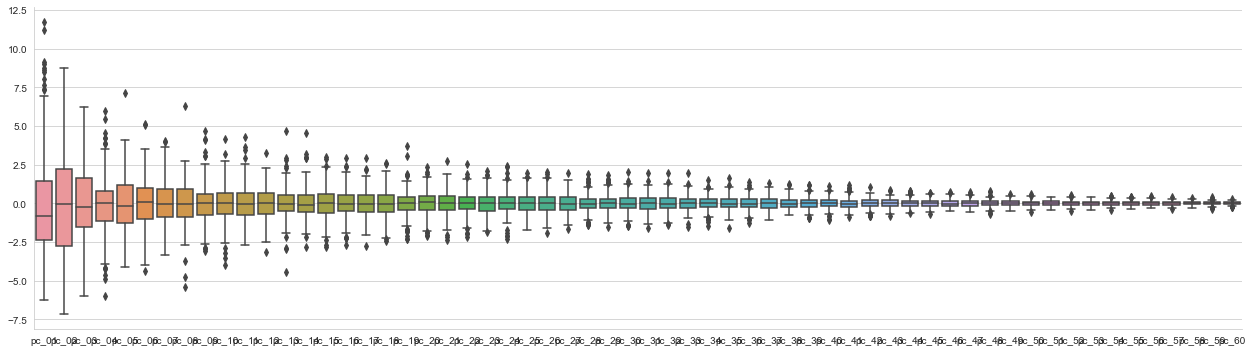

In [63]:
sns.catplot(data = sonar_pcs_df, kind='box', aspect=3.5)

plt.show()

The variation is decreasing across the PCs.

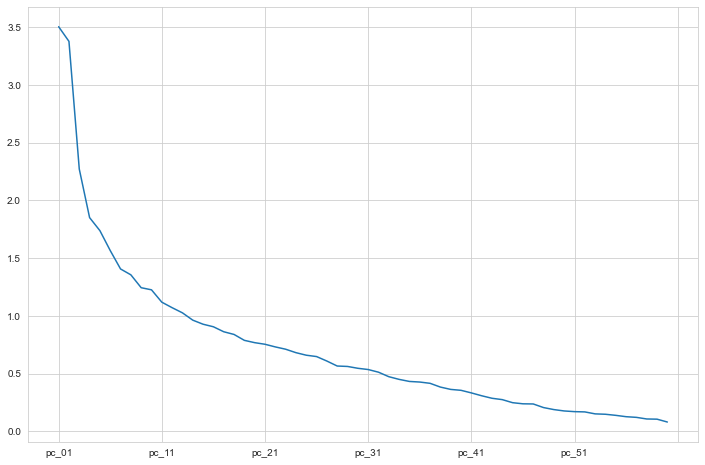

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

sonar_pcs_df.describe().loc['std'].plot(ax=ax)

plt.show()

All of the PCs are **uncorrelated**.

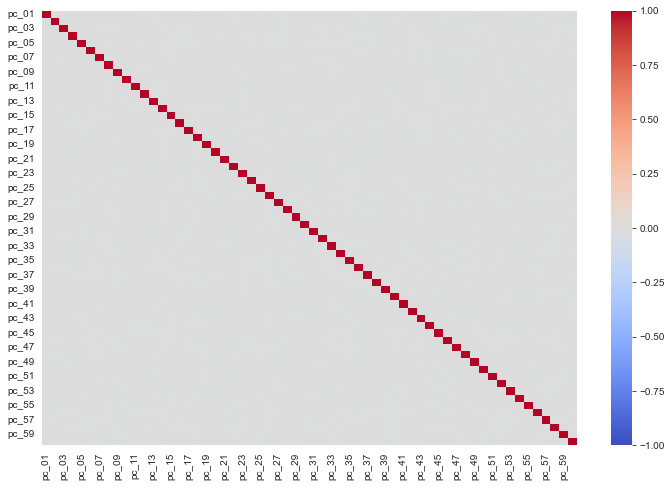

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = sonar_pcs_df.corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

We can decide the number of PCs to focus on. There are several hueristics to help us identify the **fewest** number of PCs to use. One such approach is a visual **knee bend** via the **scree plot**.

The scree plot shows the **fraction of the variance explained** per PC.

In [68]:
fraction_var_explain = pca_object.explained_variance_ratio_

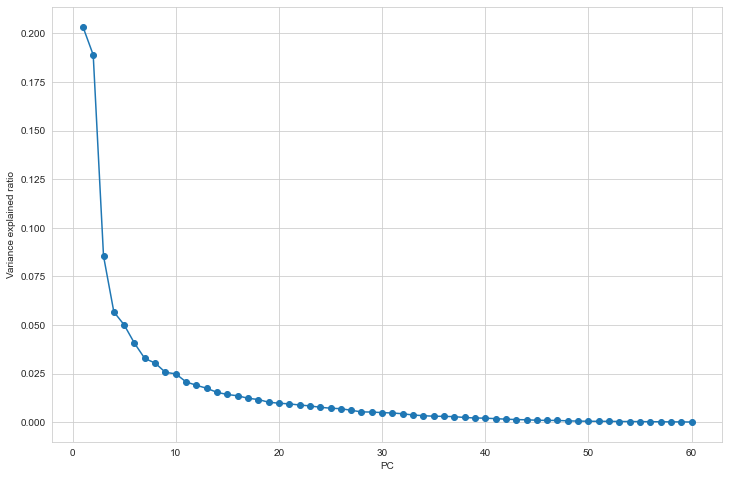

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot( np.arange(len(fraction_var_explain)) + 1, fraction_var_explain, 'o-' )

ax.set_xlabel('PC')
ax.set_ylabel('Variance explained ratio')

plt.show()

From the scree plot it looks 10 PCs are useful.

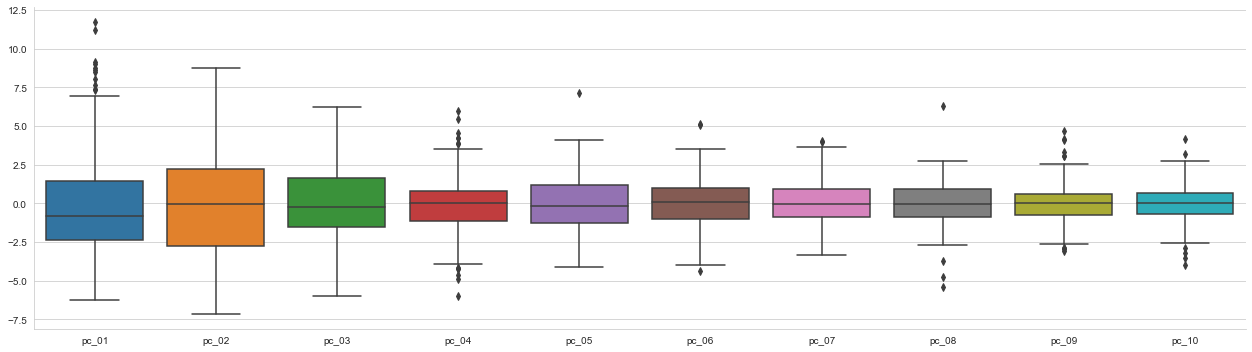

In [72]:
sns.catplot(data = sonar_pcs_df.iloc[:, :10], kind='box', aspect=3.5)

plt.show()

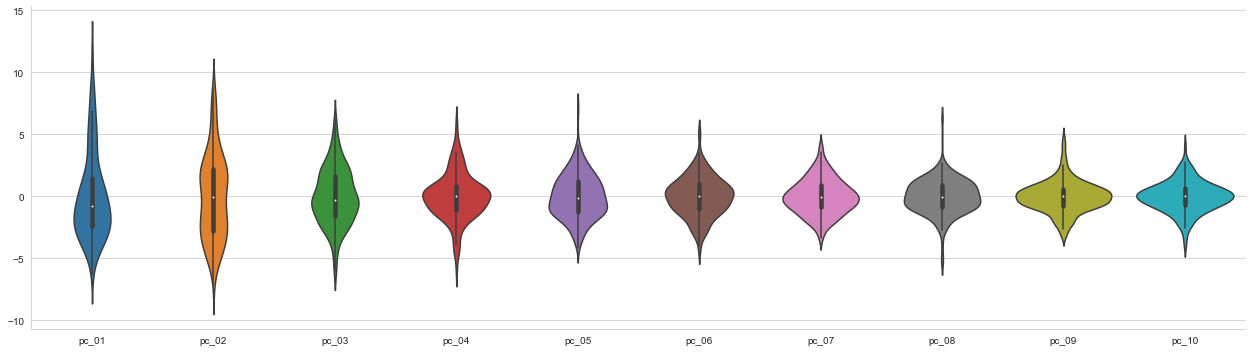

In [73]:
sns.catplot(data = sonar_pcs_df.iloc[:, :10], kind='violin', aspect=3.5)

plt.show()

Since we have 10 instead of 60 variables we can use the pair plot.

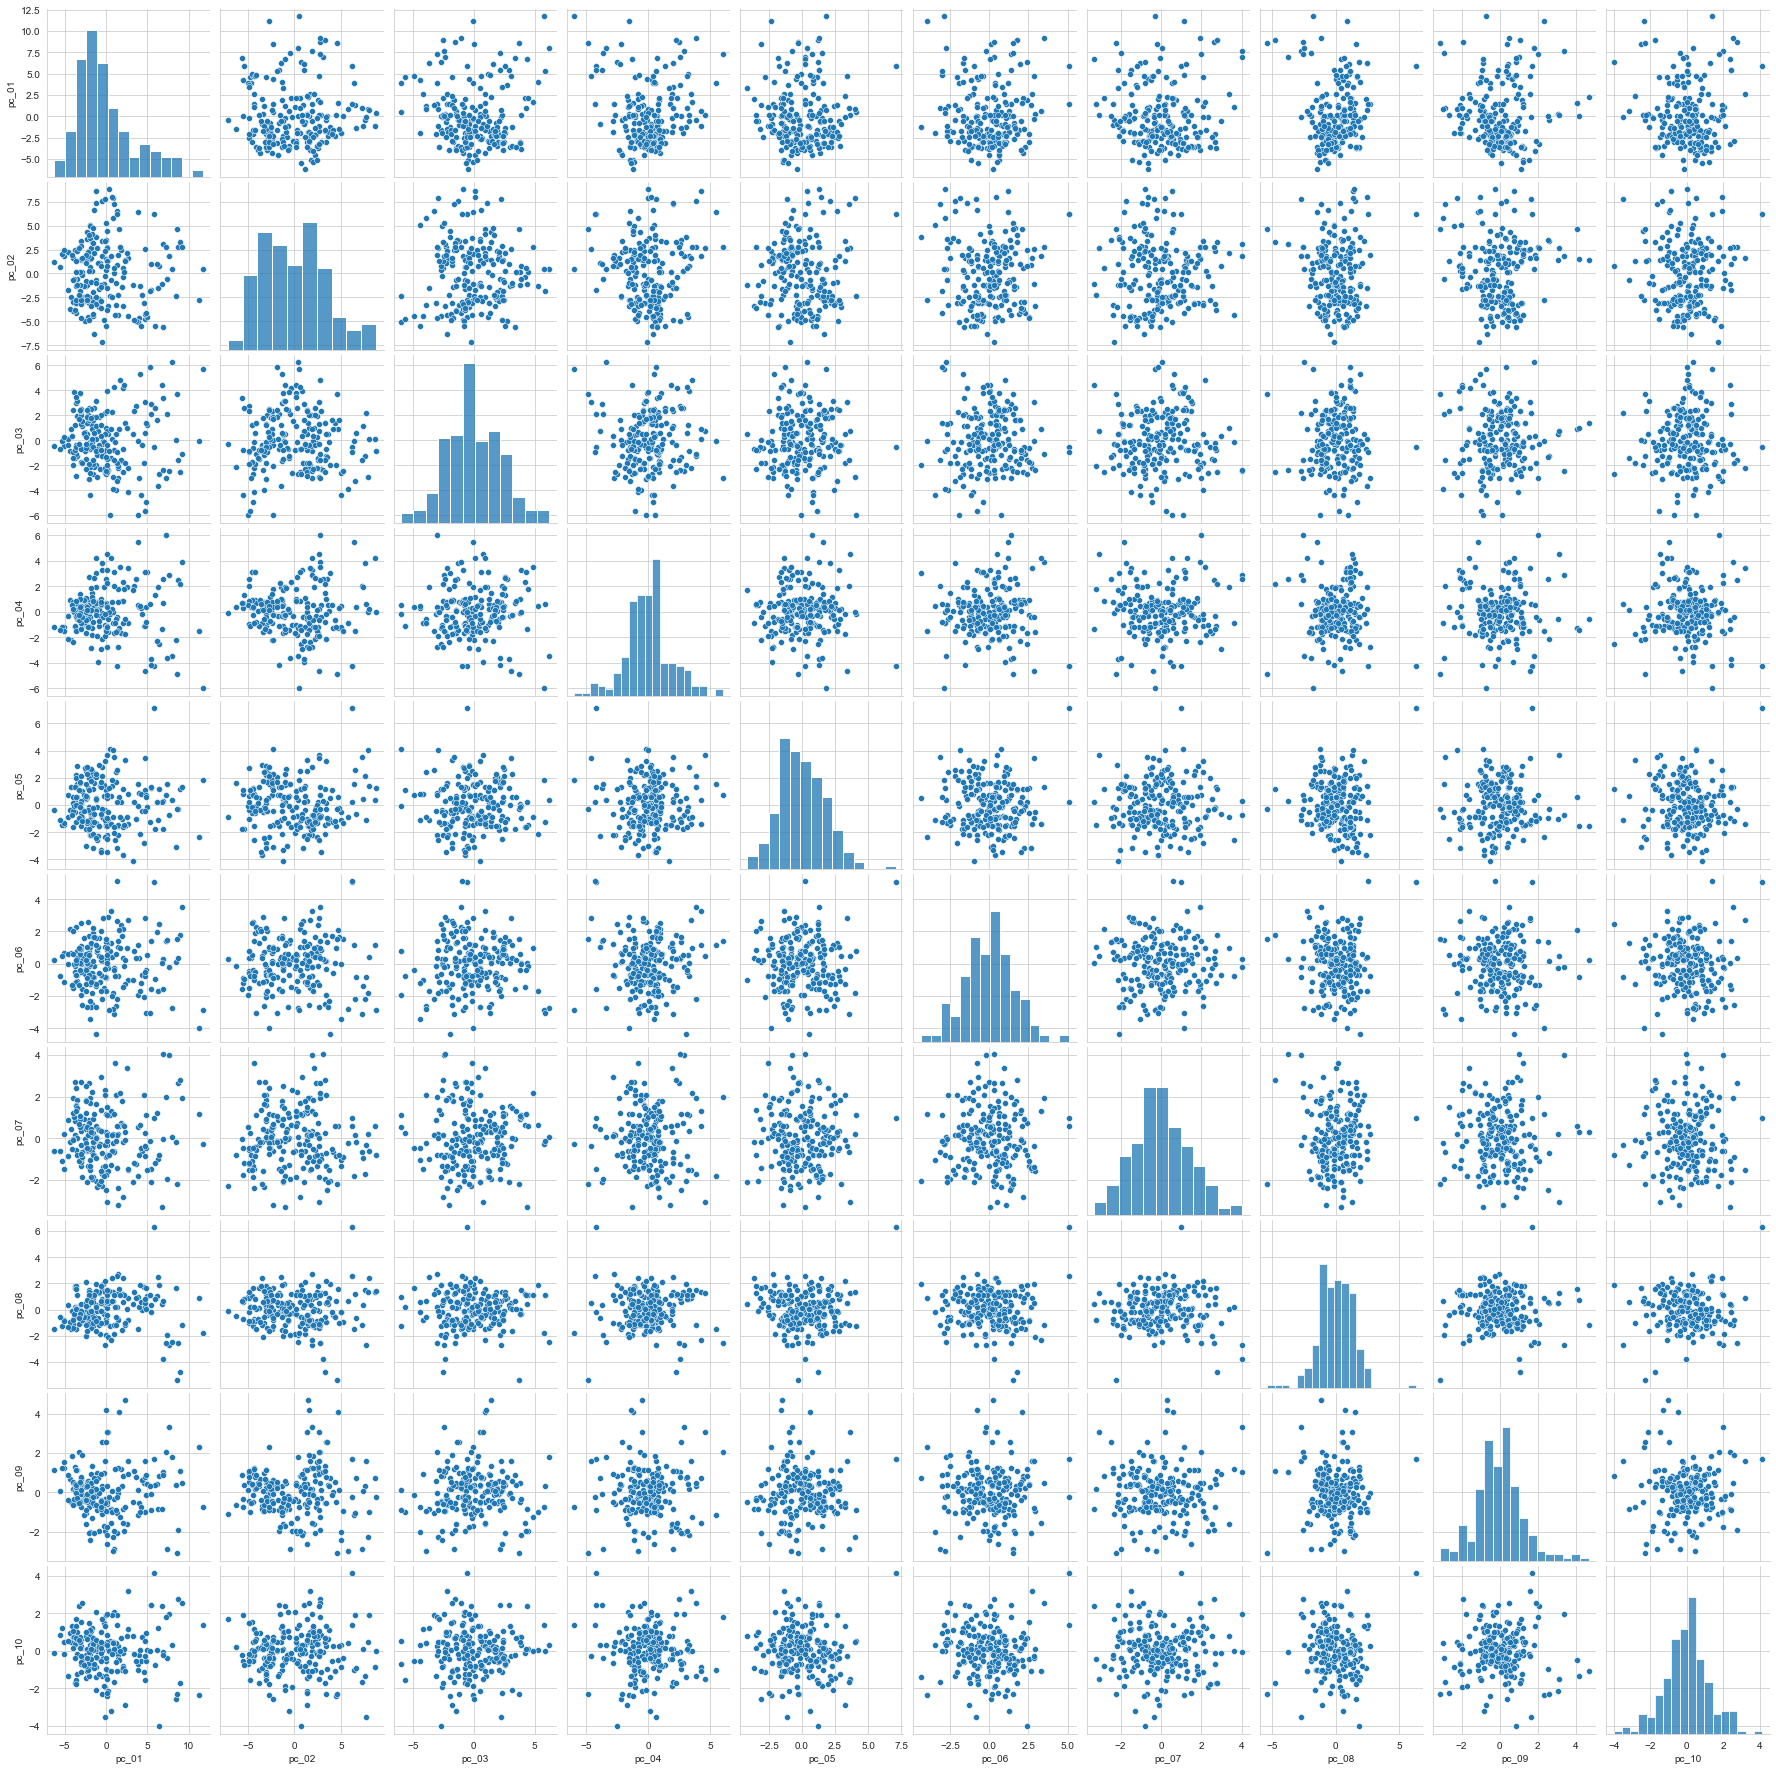

In [74]:
sns.pairplot( data = sonar_pcs_df.iloc[:, :10])

plt.show()

Let's examine the first 10 PCs grouped by `response`.

In [75]:
sonar_pcs_df['response'] = sonar_df.response

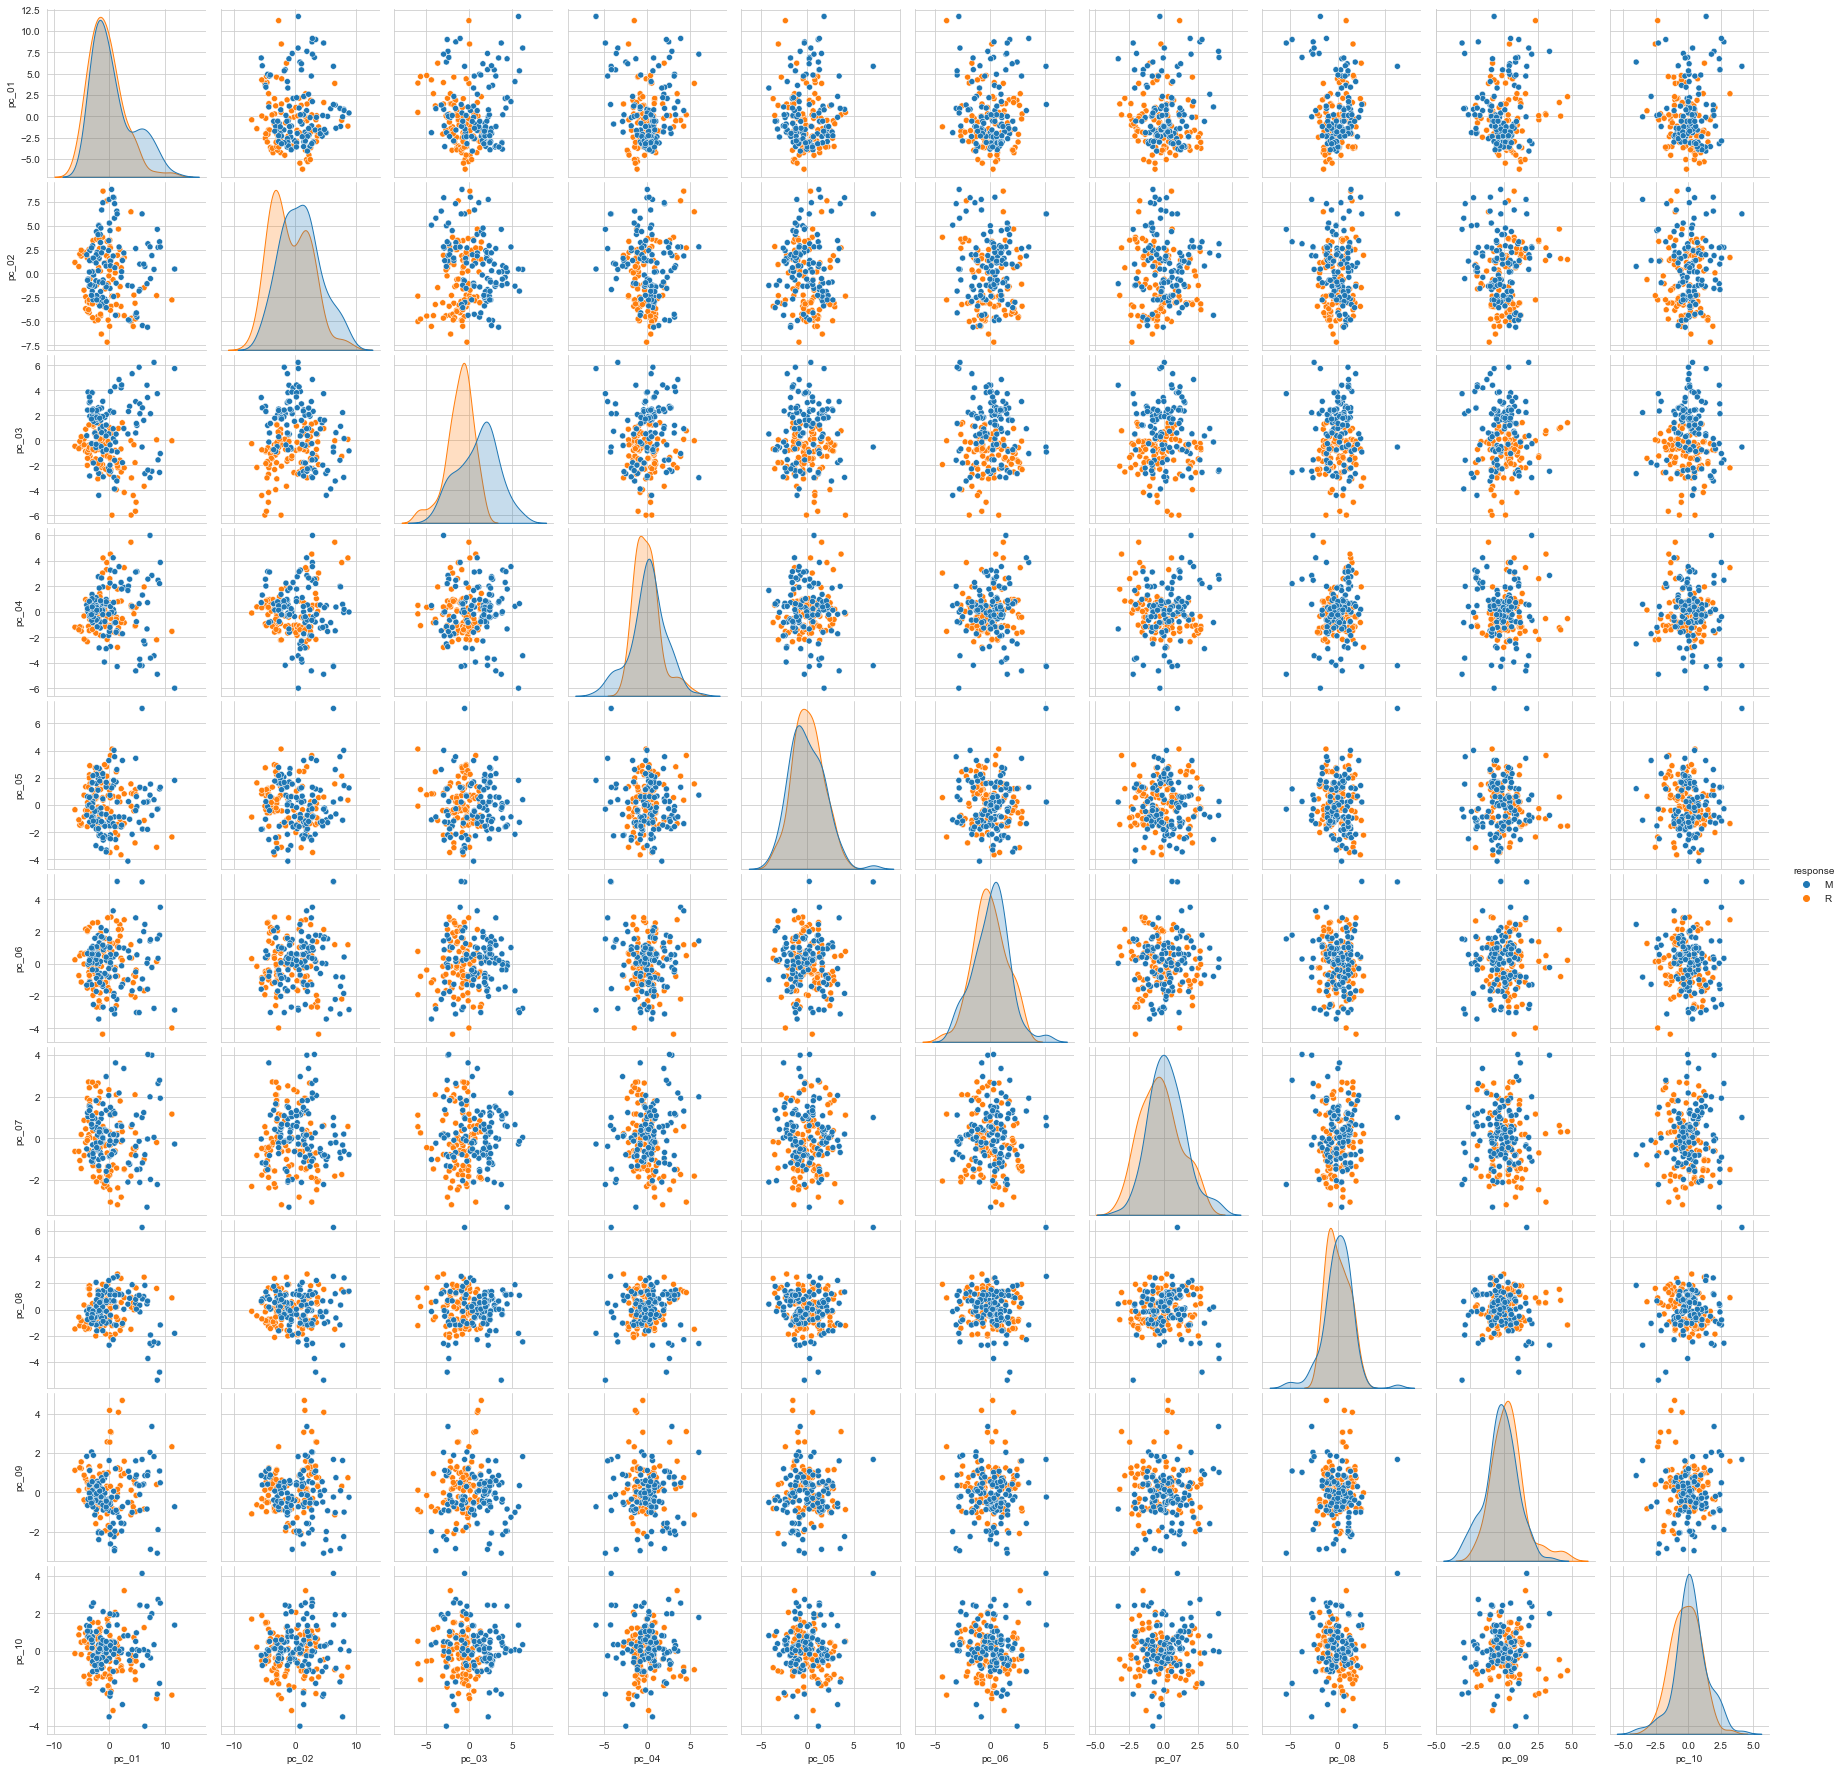

In [76]:
sns.pairplot(data = sonar_pcs_df, 
             vars=sonar_pcs_df.iloc[:, :10].columns,
             hue='response',
             diag_kws={'common_norm': False})

plt.show()